In [54]:
import os
import shutil
import torch
import scipy.ndimage as ndi
from skimage.transform import resize
from PIL import Image
import cv2
from repo.unet import UNet
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

Для рассеянного склероза: 
1. Выявлены Т2-гиперинтенсивные очаги при рассеянном склерозе
2. Установлена их локализация
3. Проведена характеристика диссеминации во времени


In [12]:
MODEL_WEIGHTS = '/mnt/mddp/etrofimenko/segmentation/weights/unet.pt'
IMAGE_SIZE = 256
IN_CHANNEL = 1
OUT_CHANNEL = 1
DEVICE = torch.device("cpu" if not torch.cuda.is_available() else 'cuda')

In [20]:
def preprocess_image(volume_numpy):
    v_shape = volume_numpy.shape
    out_shape = (v_shape[0], size, size)
    volume = resize(
        volume_numpy,
        output_shape=out_shape,
        order=2,
        mode="constant",
        cval=0,
        anti_aliasing=False,
    )
    return volume


def prediction(volume_numpy):
    
    
    with torch.set_grad_enabled(False):
        unet = UNet(IN_CHANNEL, OUT_CHANNEL)
        state_dict = torch.load(MODEL_WEIGHTS, map_location=DEVICE)
        unet.load_state_dict(state_dict)
        unet.eval()
        unet.to(DEVICE)
        
        # x = preprocess_image(x)
        x = torch.from_numpy(volume_numpy).to(DEVICE)        
        y_pred = unet(x)
        y_pred = y_pred.detach().cpu().numpy()
        
    return y_pred

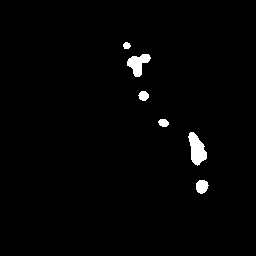

In [46]:
test_im = "pred_flair_2/images/patient10-08.png"
test_image = Image.open(test_im)
test_mask = "pred_flair_2/masks/patient10-08_pred.png"
test_mask = Image.open(test_mask)
test_t2 = "pred_t2_clean/images/patient10-08.png"
test_t2 = Image.open(test_t2)
test_mask

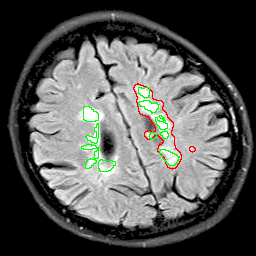

In [43]:
before = "pred_flair_2/images/patient10-12.png"
before_im = Image.open(before)
after = "pred_flair_2/images/patient10-13.png"
after_im = Image.open(after)

before_im

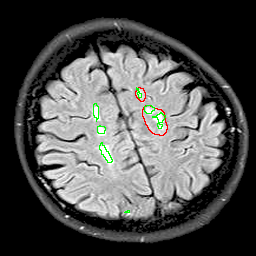

In [55]:
after_im

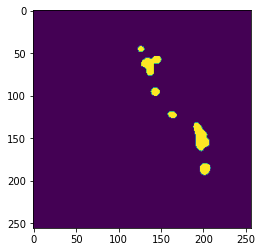

In [50]:
plt.imshow(test_mask)

In [53]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


255

In [ ]:
# loop over the contours
for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	# draw the contour and center of the shape on the image
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
	cv2.putText(image, "center", (cX - 20, cY - 20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
	# show the image
	cv2.imshow("Image", image)
	cv2.waitKey(0)

In [ ]:
RATIO_PIXEL_TO_CM = 78 # 78 pixels are 1cm
RATIO_PIXEL_TO_SQUARE_CM = 78 * 78

# 2. Calculate area
area_px = cv2.contourArea(object_contours)
area_cm = round(area_px / RATIO_PIXEL_TO_SQUARE_CM, 2)
cv2.putText(img, "A: {}cm^2".format(area_cm), (x1, y1), cv2.FONT_HERSHEY_PLAIN, 3, colors[class_id], 5)

In [ ]:
def wathc_gif():
    frames = []
    for frame in 
        # Открываем изображение каждого кадра.
        frame = Image.open(f'/home/elena/Study/Generium/datasets/sklerosis/bt_dataset/images/1/{frame_number}.jpg')
        # Добавляем кадр в список с кадрами.
        frames.append(frame)

    # Берем первый кадр и в него добавляем оставшееся кадры.
    frames[0].save(
        '/home/elena/Study/Generium/datasets/sklerosis/bt_dataset/images/homer.gif',
        save_all=True,
        append_images=frames[1:],  # Срез который игнорирует первый кадр.
        optimize=True,
        duration=100,
        loop=0
    )

In [41]:
import logging

logging

In [21]:
prediction(np.array(test_image))

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [32, 1, 3, 3], but got 2-dimensional input of size [256, 256] instead

In [ ]:
def main()
    makedirs(args)
    device = torch.device("cpu" if not torch.cuda.is_available() else args.device)

    loader = data_loader(args)

    with torch.set_grad_enabled(False):
        unet = UNet(in_channels=Dataset.in_channels, out_channels=Dataset.out_channels)
        state_dict = torch.load(args.weights, map_location=device)
        unet.load_state_dict(state_dict)
        unet.eval()
        unet.to(device)

        input_list = []
        pred_list = []
        true_list = []

        for i, data in tqdm(enumerate(loader)):
            x, y_true = data
            x, y_true = x.to(device), y_true.to(device)

            y_pred = unet(x)
            y_pred_np = y_pred.detach().cpu().numpy()
            pred_list.extend([y_pred_np[s] for s in range(y_pred_np.shape[0])])

            y_true_np = y_true.detach().cpu().numpy()
            true_list.extend([y_true_np[s] for s in range(y_true_np.shape[0])])

            x_np = x.detach().cpu().numpy()
            input_list.extend([x_np[s] for s in range(x_np.shape[0])])

    volumes = postprocess_per_volume(
        input_list,
        pred_list,
        true_list,
        loader.dataset.patient_slice_index,
        loader.dataset.patients,
    )

    dsc_dist = dsc_distribution(volumes)

    dsc_dist_plot = plot_dsc(dsc_dist)
    imsave(args.figure, dsc_dist_plot)

    for p in volumes:
        x = volumes[p][0]
        y_pred = volumes[p][1]
        y_true = volumes[p][2]
        for s in range(x.shape[0]):
            # image = gray2rgb(x[s, 1])  # channel 1 is for FLAIR
            image = gray2rgb(x[s, 0])
            image = outline(image, y_pred[s, 0], color=[255, 0, 0])
            image = outline(image, y_true[s, 0], color=[0, 255, 0])
            filename = "{}-{}.png".format(p, str(s).zfill(2))
            filepath = os.path.join(args.predictions, filename)
            imsave(filepath, image)